# Explore house prices data

## Understand the problem
The data set of this project has been downloaded from [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) Kaggle Competition. The project aims at predicting house prices in Ames, Iowa, USA based on the provided data set.

## Hypothesis generation
Before prediction step, we generally ask which factors influence our prediction ? In our case, we need to know if there are factors that influence house prices or not. By generating hypothesis, we have to define two hypothesis :
- **Null Hypothesis**: There exists no impact of a particular feature on the dependant variable.
- **Alternate Hypothesis**: There exists a direct impact of a particular feature on the dependant variable.

## Data Exploration

In [16]:
# loading librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [18]:
# loading data
train = pd.read_csv("../data/raw/train.csv")
test = pd.read_csv("../data/raw/test.csv")

In [19]:
# show the head of the data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
print('Train data has {} rows and {} columns'.format(train.shape[0], train.shape[1]))
print('Test data has {} rows and {} columns'.format(test.shape[0], test.shape[1]))

Train data has 1460 rows and 81 columns
Test data has 1459 rows and 80 columns


### Missing values
Let's check if the train data has any missing values. Out of 81 features, 19 have missing values.

In [21]:
missing_data = train.columns[train.isnull().any()]
print("Number of features that have missing values is {} features".format(len(missing_data)))
print(missing_data)

Number of features that have missing values is 19 features
Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [6]:
# function to show frequencies in percentages
def percentage(x):
    return '{0:.2f} %'.format(x * 100)

In [22]:
miss = train.isnull().sum() / len(train)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss.apply(percentage)

Electrical       0.07 %
MasVnrType       0.55 %
MasVnrArea       0.55 %
BsmtQual         2.53 %
BsmtCond         2.53 %
BsmtFinType1     2.53 %
BsmtExposure     2.60 %
BsmtFinType2     2.60 %
GarageCond       5.55 %
GarageQual       5.55 %
GarageFinish     5.55 %
GarageType       5.55 %
GarageYrBlt      5.55 %
LotFrontage     17.74 %
FireplaceQu     47.26 %
Fence           80.75 %
Alley           93.77 %
MiscFeature     96.30 %
PoolQC          99.52 %
dtype: object

We can see that the variable PoolQC has 99.5% missing values followed by MiscFeature, Alley and Fence.

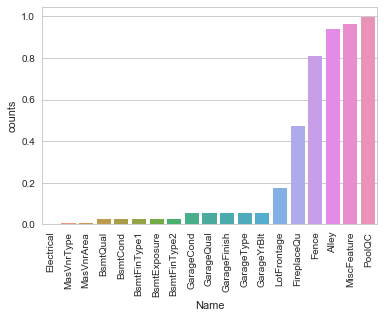

In [23]:
# prepare missing data for visualization
miss = miss.to_frame()
miss.columns = ['counts']
miss.index.names = ['Name']
miss['Name'] = miss.index

# plot the missing value count
sns.set(style='whitegrid', color_codes=True)
sns.barplot(x='Name', y='counts', data=miss)
plt.xticks(rotation=90)
plt.show()

### Duplicates data

In [34]:
# duplicates
duplicates = sum(train.duplicated(train.columns.difference(["Id"])))
print("The number of duplicates in train data is {}".format(duplicates))

The number of duplicates in train data is 0


### Target variable distribution
Let's check the distribution of the target variable **SalePrice**.

Mean of the target variable distribution is 180921.19589041095


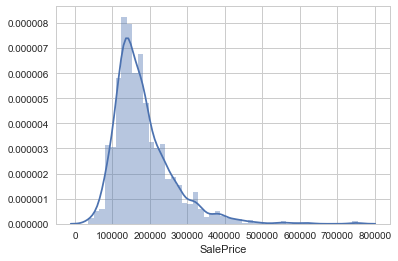

In [9]:
# target variable distribution - SalePrice
print('Mean of the target variable distribution is {}'.format(train['SalePrice'].mean()))
sns.distplot(train['SalePrice'])

We see that the distribution above (SalePrice distribution) has a right-skewed distribution. We know that the normal distribution is the easiest distribution to work with in order to gain an understanding about statistics and better modeling the relations between target and independent variables. In our case, maybe it's better to transform this variable so that it becomes normally distributed.

We can confirm this skewed behavior by calculating the [skewness metric](https://en.wikipedia.org/wiki/Skewness) of the variable distribution.

In [10]:
# skewness
print("The skewness of the target variable SalePrice is {}".format(train['SalePrice'].skew()))

The skewness of the target variable SalePrice is 1.8828757597682129


The result confirms that the distribution is right-skewed (positive), precisely it means that the right side is more skewed than the left side.

Generally, it's easier to work with normal distribution, so we try to log-transform our target variable distribution to have to see if we get any closer to normal distribution. 

Skewness of the target variable after log-transformation is 0.12133506220520406


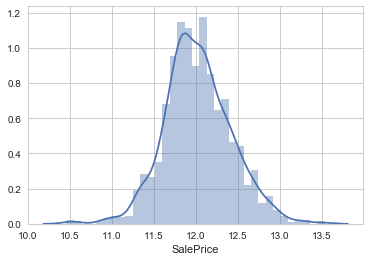

In [11]:
# target variable transformation (log transformation)
target = np.log(train['SalePrice'])
print("Skewness of the target variable after log-transformation is {}".format(target.skew()))
sns.distplot(target)

The log-transformation of the target variable has helped us fixing its skewed-distribution and now, it looks closer to normal.

### Univariate and bivariate analysis

In [40]:
# univariate analysis for independant variables
df_cat = train.select_dtypes(exclude=[np.number])
df_num = train.select_dtypes(include=[np.number])
del df_num['Id'] # we remove Id column
print("There are {} categorical variables and {} numerical variables in train data".format(df_cat.shape[1], 
                                                                                           df_num.shape[1]))

# describe categorical variables
df_cat.describe()

There are 43 categorical variables and 37 numerical variables in train data


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [39]:
# describe numerical variables
df_num.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Since we have 80 variables, analysing variables one by one wouldn't be an efficient approach. Instead, we will look at some variables based on their correlation with the target variable.